# Support Vector Machine
## 1. Linear SVM 线性SVM
从Logistic回归出发，更改损失函数
![](../imgs/svm1.png)
$cost_{1}(\theta^{\top}x)\ <-\ -\log{h_{\theta}(x^{(i)})}$
$cost_{0}(\theta^{\top}x)\ <-\ -\log{(1-h_{\theta}(x^{(i)}))}$
当y=1的时候，期望$\theta^{\top}x\ge 1$，对比Logistic回归的$\theta^{\top}x\ge 0$
当y=0的时候，期望$\theta^{\top}x\le -1$，对比Logistic回归的$\theta^{\top}x\le 0$
### 大边界分类与SVM
根据线性代数知识，有$\theta^{\top}x^{(i)}=p^{(i)}||\theta||$
考虑我们的损失函数：
$$\min_{\theta}{C\sum_{i=1}^{m}[y^{(i)}cost_{1}(\theta^{\top}x^{(i)})+(1-y^{(i)})cost_{0}(\theta^{\top}x^{(i)})]+\frac{1}{2}\sum_{i=1}^{n}{\theta^{2}_{j}}}$$
在y=1的时候，期望$\theta^{\top}x\ge 1$，前半部分为0；
在y=0的时候，期望$\theta^{\top}x\le -1$，前半部分也为0；
事实上要最小化$\frac{1}{2}\sum_{i=1}^{n}{\theta^{2}_{j}}$
在保证分类效果的同时，最小化$\theta$
**决策边界和$\theta$方向垂直**
![](../imgs/svm2.png)
![](../imgs/svm3.png)
$p||\theta||\ge 1$
这两幅图说明，$p$越大的时候，越趋向于进行大边界分类，$||\theta||$越小。这也是正则化的时候，会进行“更好”分类的视角之一。


相比于逻辑回归要求$\theta^{\top}x^{(i)}\ge 0$，SVM要求的$\theta^{\top}x^{(i)}\ge 1$会使得两个类别的间距变大。从0变为(-1,1)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

加载数据，查看数据形状

In [2]:
data = loadmat('data/ex6data1.mat')
x = data.get('X')
y = data.get('y')
x.shape, y.shape

((51, 2), (51, 1))

数据集可视化

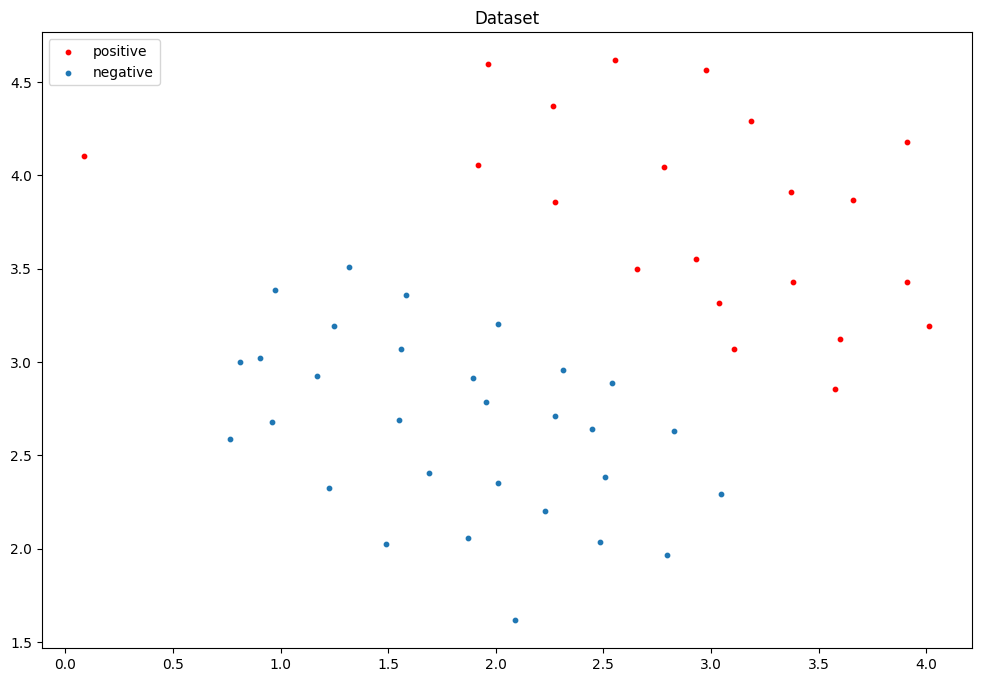

In [3]:
fig, ax = plt.subplots(figsize=(12,8))
positive_data_idx= np.where(y[:,0]==1)
positive_data = x[positive_data_idx]
negative_data_idx= np.where(y[:, 0] == 0)
negative_data = x[negative_data_idx]
ax.scatter(x=positive_data[:, 0], y=positive_data[:, 1], s=10, color="red",label="positive")
ax.scatter(x=negative_data[:, 0], y=negative_data[:, 1], s=10, label="negative")
ax.set_title("Dataset")
plt.legend(loc=2)
plt.show()

C = 100, 100000 Over fitting
C = 1, 1000,ok

In [4]:
from sklearn import svm
svc = svm.LinearSVC(C=1, max_iter=1000)
svc.fit(x,y.ravel())
theta1 = [svc.intercept_[0], svc.coef_[0,0], svc.coef_[0,1]]
theta1

[-3.563180921806814, 0.44887311728575907, 0.7639832104249416]

决策边界

-3.563180921806814 4.663951868555995 -0.5875431700077383


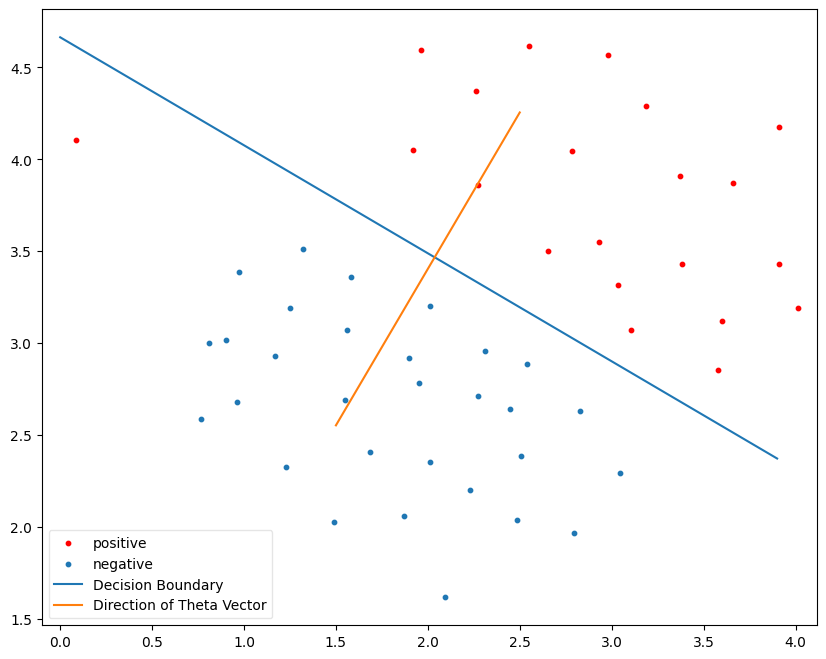

In [9]:
x_ax = np.arange(0, 4, 0.1)
xx = np.array([1.5,2.5])
y_ax = -theta1[0] / theta1[2] + (-theta1[1] / theta1[2])*x_ax
print(theta1[0],-theta1[0] / theta1[2],-theta1[1] / theta1[2])
yy = (theta1[2] / theta1[1] )*xx
plt.figure(figsize=(10,8))
plt.scatter(x=positive_data[:, 0], y=positive_data[:, 1], s=10, color="red",label="positive")
plt.scatter(x=negative_data[:, 0], y=negative_data[:, 1], s=10, label="negative")
plt.plot(x_ax, y_ax , label="Decision Boundary")
plt.plot(xx, yy, label="Direction of Theta Vector")
plt.axis('equal')
plt.legend(loc='best',framealpha=0.5)
plt.show()

In [6]:
from sklearn import svm
svc2 = svm.LinearSVC(C=100, max_iter=100000)
svc2.fit(x,y.ravel())
theta2 = [svc2.intercept_[0], svc2.coef_[0,0], svc2.coef_[0,1]]
theta2

[-16.1620956097194, 1.5124698230401048, 3.94522087297894]

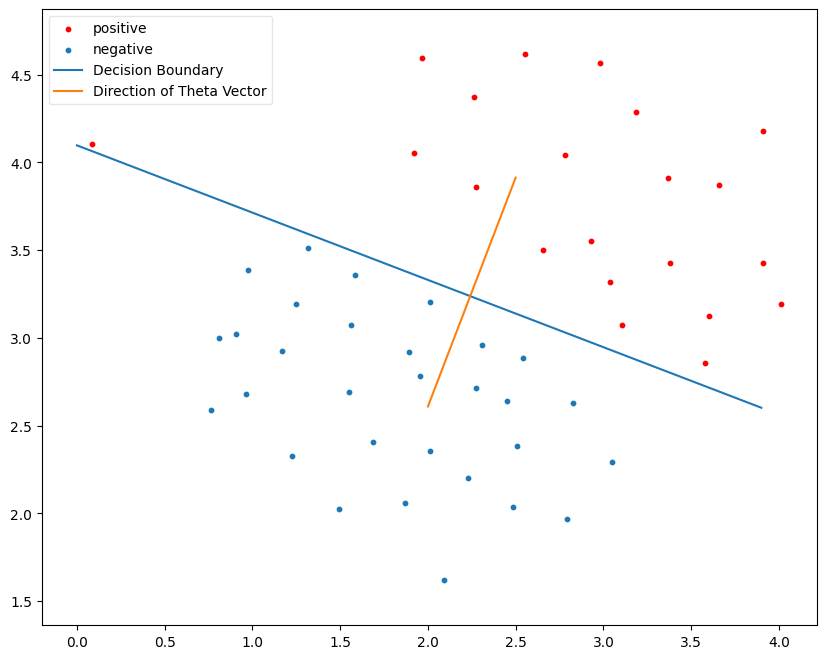

In [10]:
x_ax = np.arange(0, 4, 0.1)

y_ax = -theta2[0] / theta2[2] + (-theta2[1] / theta2[2])*x_ax

plt.figure(figsize=(10,8))
plt.scatter(x=positive_data[:, 0], y=positive_data[:, 1], s=10, color="red",label="positive")
plt.scatter(x=negative_data[:, 0], y=negative_data[:, 1], s=10, label="negative")
plt.plot(x_ax, y_ax, label="Decision Boundary")

xx = np.array([1,1.5])
yy = (theta2[2] / theta2[1] )*xx
plt.plot(xx + 1, yy, label="Direction of Theta Vector")

plt.axis('equal')
plt.legend(loc=0,framealpha=0.5)
plt.show()

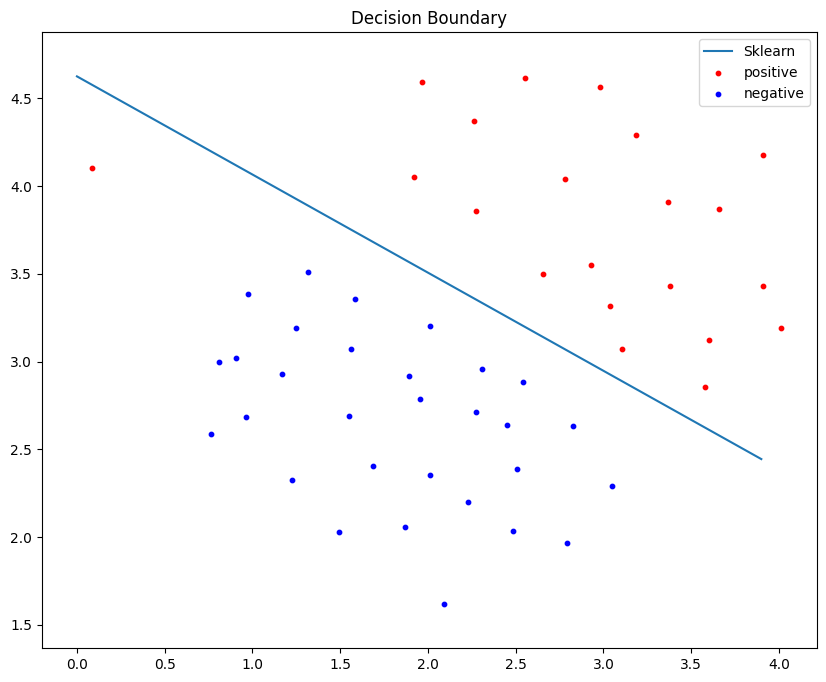

In [8]:
from sklearn.linear_model import LogisticRegression
sk_lr = LogisticRegression(max_iter=50000)
sk_lr.fit(x,y.ravel())
sk_theta = np.array([[sk_lr.intercept_[0],sk_lr.coef_[0,0],sk_lr.coef_[0,1]]])

coef1 = -(sk_theta / sk_theta[0,2])

plt.figure(figsize=(10,8))
y1 = coef1[0,0] + coef1[0,1]*x_ax
plt.plot(x_ax,y1,label="Sklearn")
plt.scatter(x=positive_data[:, 0], y=positive_data[:, 1], s=10, color="red",label="positive")
plt.scatter(x=negative_data[:, 0], y=negative_data[:, 1], s=10, color="blue",label="negative")
plt.title("Decision Boundary")
plt.axis('equal')
plt.legend(loc='best')
plt.show()